<a href="https://colab.research.google.com/github/MoamenAhmedEl-Nashar/machine-learning-projects/blob/master/Fashion_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clothes classification with Keras 



**Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:**

- 60,000 training examples
- 10,000 testing examples
- 10 classes
- 28×28 grayscale/single channel images

**The ten fashion class labels include:**

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

# Data Loading

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
print(type(x_train), x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


In [0]:
print(type(y_train), y_train.shape)

<class 'numpy.ndarray'> (60000,)


In [0]:
from matplotlib import pyplot as plt

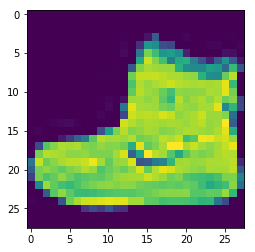

In [0]:
plt.imshow(x_train[0])

In [0]:
print(y_train[0])

9


# Data Preprocessing

In [0]:
from keras.utils import to_categorical

In [0]:
# Convert labels to categorical one-hot encoding
one_hot_y_train = to_categorical(y_train, num_classes=10)
one_hot_y_test = to_categorical(y_test, num_classes=10)

In [0]:
print(y_test[0])
print(one_hot_y_test[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Data Normalization

**keras.utils.normalize(x, axis=-1, order=2)**
Normalizes a Numpy array.

**Arguments**

- **x**: Numpy array to normalize.
- **axis**: axis along which to normalize.
- **order**: Normalization order (e.g. 2 for L2 norm).

**Returns**

 A normalized copy of the array.

In [0]:
from keras.utils import normalize

In [0]:
x_train_norm = normalize(x_train, axis=-1, order=2)

In [0]:
x_test_norm = normalize(x_test, axis=-1, order=2)

# Build NN Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)), # image flatten
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

# Model Training

In [0]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(x_train_norm, one_hot_y_train, epochs=30, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.5164 - acc: 0.8128
Epoch 2/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.3670 - acc: 0.8650
Epoch 3/30
60000/60000 [==============================] - 4s 65us/step - loss: 0.3301 - acc: 0.8787
Epoch 4/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.3071 - acc: 0.8867
Epoch 5/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2921 - acc: 0.8911
Epoch 6/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2784 - acc: 0.8972
Epoch 7/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2653 - acc: 0.9024
Epoch 8/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.2537 - acc: 0.9055
Epoch 9/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2476 - acc: 0.9071
Epoch

# Model Testing

In [0]:
model.evaluate(x_test_norm, one_hot_y_test, batch_size=64)

10000/10000 [==============================] - 0s 23us/step


[0.503162767291069, 0.8826]